
# Code Intent Prediction
## With Applied Machine Learning Techniques
***
### Justin Hugh
#### Data Science Diploma Candidate, BrainStation
##### December 18, 2020

***

## Table of Contents
#### [ 1.0 - Introduction & Background](#Introduction-&-Background)

#### [ 2.0 - Background](#Background)
- [ 2.1 - Stack Overflow](#Stack-Overflow)
- [ 2.2 - Packages and Libraries](#Packages-and-Libraries)

#### [ 3.0 - The Data](#The-Data)
- [ 3.1 - Sources of Data](#Sources-of-Data)  
    - [ 3.1.1 - CoNaLa](#CoNaLa)
- [ 3.2 - Data Characteristics](#Data-Characteristics)  

#### [ 4.0 - Limitations and Assumptions](#Limitations-and-Assumptions)

#### [ 5.0 - Exploratory Data Analysis](#Exploratory-Data-Analysis)  
- [ 5.1 - Importing Data](#Importing-Data)   
    - [ 5.1.1 - CoNaLa Competition Data](#CoNaLa-Competition-Data)
        - [ 5.1.1.1 - CoNala Training Data](#CoNaLa-Training-Data)
        - [ 5.1.1.2 - CoNaLa Test Data](#CoNaLa-Test-Data)
        - [ 5.1.1.3 - DataFrames from CoNaLa Competition Data](#DataFrames-from-CoNaLa-Competition-Data)
    - [ 5.1.2 - CoNaLa Mined Data](#CoNaLa-Mined-Data)
        - [ 5.1.2.1 - Proposed `prob` Cutoff](#Proposed-prob-Cutoff)
- [ 5.2 - Combining Data](#Combining-Data) &&& Double Check This!
    - [ 5.2.1 - Cleaning Data](#Cleaning-Data)
- [ 5.3 - Vectorizing Text Data](#Vectorizing-Text-Data) && Should this go before combining?
    - [ 5.3.1 - Simple Bag of Words Vectorization](#Simple-Bag-of-Words-Vectorization)
        - [ 5.3.1.1 - Vectorizing `conala_train_df` with Bag of Words](#Vectorizing-conala_train_df-with-Bag-of-Words)
        - [ 5.3.1.2 - Vectorizing `conala_mined_df` with Bag of Words](#Vectorizing-conala_mined_df-with-Bag-of-Words)
        - [ 5.3.1.3 - Comparing Vectorized `conala_mined_df` and `conala_trained_df`](#Comparing-Vectorized-conala_mined_df-and-conala_trained_df)
        - [ 5.3.1.4 - Combining DataFrames](#Combining-DataFrames)
        - [ 5.3.1.5 - Dimension Reduction of Bag of Words](#Dimension-Reduction-of-Bag-of-Words)
            - [ 5.3.1.5.1 - PCA on Bag of Words](#PCA-on-Bag-of-Words)
            - [ 5.3.1.5.2 - T-SNE on Bag of Words](#T-SNE-on-Bag-of-Words)
    - [ 5.3.2 - Word2Vec Text Vectorization](#Word2Vec-Text-Vectorization)
        - [ 
        
- [ Intent Paradigms](#Intent-Paradigms)  

#### [ Modelling and Analysis](#Modelling-and-Analysis)
    
#### [ Conclusion](#Conlusion)  
#### [ References](#References)

***

# Introduction
[[Back to TOC]](#Table-of-Contents)

Software and code are becoming present nearly everywhere in our daily lives both personal and professional. Whether it helps us accomplish complex and massive tasks, or powers the applications and products we rely on, the digital world is expanding. Yet only a fraction of us are literate in code. Even among those of us who are, there exists a wide range of languages and frameworks so no one is familiar with it all. 

I propose a model which could predict the intent or purpose of a sample of code. A tool like this would help us understand more of the world around us and would be hugely impactful for:  
- Education. Making code more accessible and interpretable.  
- Security. Identifying code with malicious intent.  
- Development. Providing contextual tooltips, suggestions, resources.   

The goal of this project is to develop an ML model which employs NLP tools to interpret a piece of code and determine what it is trying to accomplish.

This report and project are conducted as a final requirement and submission for the BrainStation Data Science Bootcamp. I participated in the Toronto Fall 2020 cohort. 

***

# Background
[[Back To TOC]](#Table-of-Contents)

In any project it's important to recognize the context of what's being investigated and how, other than the just code and the model we create. In this section, we'll discuss the important subject matter surrounding the problems we're tackling. 

##  Stack Overflow
[[Back To TOC]](#Table-of-Contents)

**Stack Overflow** is an online community for programmers [[1]](#References). The website provides a question and answer experience in which programmers can submit questions about how to accomplish various tasks or identify bugs in their code. Responders are other programmers who know of a solution or can provide helpful direction, often in the form of a code snippet. This website and service has become very widely popular and as a result hosts a large collection of code snippets, paired with a question/query. Much of the code examined and used in this project originally came from a post on Stack Overflow.

## Packages and Libraries
[[Back To TOC]](#Table-of-Contents)

There's a wealth of support openly available in the form of packages for Machine Learning, and other problem areas I'll touch on in this project. 

I import some necessary ones below in this section. 

In [1]:
# Libraries for general array/dataframe use.
import numpy as np 
import pandas as pd 

# Libraries for data visualization with python
import matplotlib.pyplot as plt
import seaborn as sns
# Magic function to help presentation of these visuals.
%matplotlib inline

# Data Import
import pickle

# Data Processing/Transform
import json
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp

# The classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# NLP
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import string
from sklearn.neighbors import NearestNeighbors

# runtime
from tqdm import tqdm
import time 
import warnings
warnings.filterwarnings("ignore")

# timeseries
from statsmodels.api import tsa
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

***

# Limitations and Assumptions
[[Back To TOC]](#Table-of-Contents)

In this section I'll recognize some of the limitiations and assumptions to the modelling and analysis I will conduct. Those listed here are generally applicable to the project at large. Any that are more specifically applicable to a certain step are discussed at that point in the analysis.

- Some of this data is not current. One of the main sources of the data comes from a competition which was conducted in 2018. Software changes quite quickly and frequently. My model and this system's performance may be less applicable to presently constructed code, and will deprecate over time as libraries and languages are updated and the language, or prevalence of various functions adjusts to this.

- I assume the data set originating from the competition training data does not have known significant errors, such as incorrect application of code or erroneous syntax. If these are present in abundance, then this system's performance will have "learned" incorrect code application.  

- I assume the data set which I've modified from the *mined* data of the competition is adequately described by the "probability" it includes (discussed in more detail below). If the model which generates these probabilities is heavily flawed, then the result will be a poorly performing model as it is based on this data. Additionally, any bias which is included in the method for generating a probability score will feed forward into my own model, as this score was used to interpret the quality of the data.

- Developers are not uniquely identified in the data I've used. Not having this information restricts me from making more deep insights into code and intent on a developer-by-developer level which could potentially mean more accurate interpretations. Different developers can accomplish the same task by coding with quite different styles. However, not uniquely identifiying the developers is a good and necessary practice from a privacy and standpoint. If developers were uniquely identified in the data, this could potentially be used to reconstruct personal data, constituting a notable privacy concern.

***

# The Data
[[Back To TOC]](#Table-of-Contents)

A model is only as good as the data it uses. In this section I'll discuss the inputs in this project; where it comes from, what it looks like, and how I hope to use it.

## Sources of Data
[[Back To TOC]](#Table-of-Contents)

To acquire the data used in this project, I accessed numerous resources hoping to create a balance. On one hand, I was able to find some well-structured and cleaned data, and on the other, in order to bolster the amount of data I had, I accessed other data sets. 

&&&&&&& Conducting some scraping and intent learning myself? &&&&&&&&&&

I'll discuss where we obtained the data below. It's important to note where the data used to train the model I've created comes from. With that understanding it's possible to see some quirks, patterns, and other important information to keep in mind throughout this project.

### CoNaLa
[[Back To TOC]](#Table-of-Contents)

[_The Code/Natural Language Challenge (CoNaLa)_](https://conala-corpus.github.io/#dataset-information) is a challenge that was created by [_Carnegie Mellon University (CMU)_](https://www.cmu.edu/) along with [_NeuLab_](http://www.cs.cmu.edu/~neulab/) and [_STRUDEL Lab_](https://cmustrudel.github.io/) on May 31, 2018 in order to test systems for generating programs from natural language [[1]](#References). The original intent was to - given an english input such as "sort list x in reverse order" - have a system output `x.sort(reverse=True)` in Python. 

_CoNaLa_ is a competition with no end date, and are offered for use within the challenge itself, or any other research on the intersection of code and natural languague - which this project falls nicely into.

_CoNaLa_ provides a wealth of publicly available data which is well suited for the needs of this project (and ours) including: 
- Data crawled from _Stack Overflow_ with 2,379 training examples, and 500 test examples. These have been curated by annotators.
- Automatically-mined data with 600,000 examples. 
- Links to other helpful and similar data sets:
    - [Django Dataset](https://ahcweb01.naist.jp/pseudogen/)  
    - [StaQC](https://github.com/LittleYUYU/StackOverflow-Question-Code-Dataset)[3]  
    - [Code Docstring Corpus](https://github.com/EdinburghNLP/code-docstring-corpus)[4]  
    
&&&&
I accessed these data in a couple different ways (direct download from CoNaLa, git, etc.)
&&&&

## Data Characteristics
[[Back To TOC]](#Table-of-Contents)

***

# Exploratory Data Analysis
[[Back To TOC]](#Table-of-Contents)

The purpose of Exploratory Data Analysis (EDA) step is to familiarize ourselves with the data, determine whether it has missing values or other deficiencies, clean the data so it may be analyzed, and peek at some of the more immediately evident insights of the data and parameters we're working with. By the end of these activities, we will have a cleaned set of data which is prepared for modelling and deeper analysis.

## Importing Data
[[Back To TOC]](#Table-of-Contents)

Before conducting exploration, I'll have to load in the data to this notebook. The data comes from a variety of different sources, each requiring a different workflow in order to bring into this workbook and analyze. In this section I'll outline the methods I used for doing this. I'll also conduct the data imports themselves in this section.

### CoNaLa Competition Data
[[Back To TOC]](#Table-of-Contents)


Recall from the [**CoNaLa Section**](#CoNaLa) above, the Competition data is comprised of data crawled from Stack Overflow with 2,379 training examples, and 500 test examples. These have been curated by annotators for use in the competition. This data is quite conveniently available and already quite clean since it was intended for immediate use in the competition.

To access this data, you can conduct a direct download by clicking this link: [CoNaLa Corpus v1.1 (.zip file, 52.1 MB)](http://www.phontron.com/download/conala-corpus-v1.1.zip).

The training examples and the test examples are stored in separate folders within this .zip file, and so are loaded into this notebook indepenndently.

#### CoNaLa Training Data
[[Back To TOC]](#Table-of-Contents)


I start first with the training data.

This data is provided in the format of a .json file, in a set of subfolders. I peeked at the data by opening the json file and viewing the text contained. A preview of what the data looks like is included below:

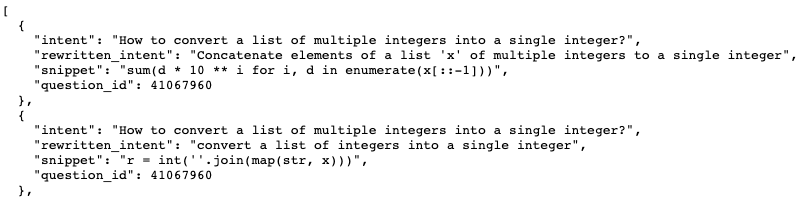

This looks like the data is contained in a list of JSON objects. Knowing this, I can construct my data extraction process accordingly.

In [3]:
# CoNaLa Training Data

# Open file, handle with `with` statement and load the contents which are contained as a json object.
# Instantiate conala_train_data to hold the data.
with open('data/conala-corpus/conala-train.json') as f:
    conala_train_data = json.load(f)

In [4]:
# Peek at the loaded data
conala_train_data

[{'intent': 'How to convert a list of multiple integers into a single integer?',
  'rewritten_intent': "Concatenate elements of a list 'x' of multiple integers to a single integer",
  'snippet': 'sum(d * 10 ** i for i, d in enumerate(x[::-1]))',
  'question_id': 41067960},
 {'intent': 'How to convert a list of multiple integers into a single integer?',
  'rewritten_intent': 'convert a list of integers into a single integer',
  'snippet': "r = int(''.join(map(str, x)))",
  'question_id': 41067960},
 {'intent': 'how to convert a datetime string back to datetime object?',
  'rewritten_intent': "convert a DateTime string back to a DateTime object of format '%Y-%m-%d %H:%M:%S.%f'",
  'snippet': "datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f')",
  'question_id': 4170655},
 {'intent': 'Averaging the values in a dictionary based on the key',
  'rewritten_intent': 'get the average of a list values for each key in dictionary `d`)',
  'snippet': '[(i, sum(j) / len(j)) for 

In [13]:
# Check number of json objects in the list.
len(conala_train_data)

2379

This variable successfully loaded the data in a similar format, that is as a list of json objects, or equivalently, a list of dictionaries. I'll move onto the Test data and take the same approach.

#### CoNaLa Test Data
[[Back To TOC]](#Table-of-Contents)

Similarly, this data is provided in the format of a .json file, in a set of subfolders. I peeked at the data, and show a preview included below:

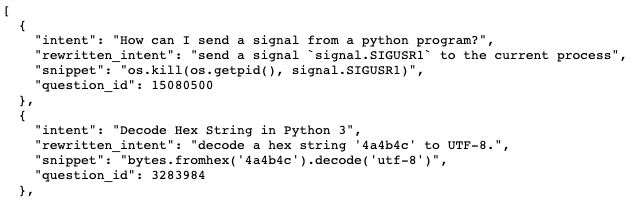

This is similarly a list of JSON objects.

In [5]:
# CoNaLa Test Data

# Open file
# Instantiate conala_test_data to hold the data.
with open('data/conala-corpus/conala-test.json') as f:
    conala_test_data = json.load(f)

In [6]:
# Peek
conala_test_data

[{'intent': 'How can I send a signal from a python program?',
  'rewritten_intent': 'send a signal `signal.SIGUSR1` to the current process',
  'snippet': 'os.kill(os.getpid(), signal.SIGUSR1)',
  'question_id': 15080500},
 {'intent': 'Decode Hex String in Python 3',
  'rewritten_intent': "decode a hex string '4a4b4c' to UTF-8.",
  'snippet': "bytes.fromhex('4a4b4c').decode('utf-8')",
  'question_id': 3283984},
 {'intent': 'check if all elements in a list are identical',
  'rewritten_intent': 'check if all elements in list `myList` are identical',
  'snippet': 'all(x == myList[0] for x in myList)',
  'question_id': 3844801},
 {'intent': 'Format string dynamically',
  'rewritten_intent': 'format number of spaces between strings `Python`, `:` and `Very Good` to be `20`',
  'snippet': "print('%*s : %*s' % (20, 'Python', 20, 'Very Good'))",
  'question_id': 4302166},
 {'intent': 'How to convert a string from CP-1251 to UTF-8?',
  'rewritten_intent': None,
  'snippet': "d.decode('cp1251').en

In [14]:
# Check number of json objects in the list.
len(conala_test_data)

500

#### DataFrames from CoNaLa Competition Data
[[Back To TOC]](#Table-of-Contents)

In this section, I manipulate the data to be in a more workable format, namely a pandas DataFrame. Conveniently pandas includes a method `from_dict` which is able to ingest the json data in its current form and create a DataFrame from this.

In [15]:
# Create DataFrames from the CoNaLa train and test sets, both from a list of dictionary objects
conala_train_df = pd.DataFrame.from_dict(conala_train_data)
conala_test_df = pd.DataFrame.from_dict(conala_test_data)

# Peek at the dfs
display(conala_test_df.head())
display(conala_train_df.head())

# Check Shapes of dfs
print(conala_train_df.shape)
print(conala_test_df.shape)

,intent,rewritten_intent,snippet,question_id
0,How can I send a signal from a python program?,send a signal `signal.SIGUSR1` to the current ...,"os.kill(os.getpid(), signal.SIGUSR1)",15080500
1,Decode Hex String in Python 3,decode a hex string '4a4b4c' to UTF-8.,bytes.fromhex('4a4b4c').decode('utf-8'),3283984
2,check if all elements in a list are identical,check if all elements in list `myList` are ide...,all(x == myList[0] for x in myList),3844801
3,Format string dynamically,format number of spaces between strings `Pytho...,"print('%*s : %*s' % (20, 'Python', 20, 'Very G...",4302166
4,How to convert a string from CP-1251 to UTF-8?,None,d.decode('cp1251').encode('utf8'),7555335


,intent,rewritten_intent,snippet,question_id
0,How to convert a list of multiple integers int...,Concatenate elements of a list 'x' of multiple...,"sum(d * 10 ** i for i, d in enumerate(x[::-1]))",41067960
1,How to convert a list of multiple integers int...,convert a list of integers into a single integer,"r = int(''.join(map(str, x)))",41067960
2,how to convert a datetime string back to datet...,convert a DateTime string back to a DateTime o...,datetime.strptime('2010-11-13 10:33:54.227806'...,4170655
3,Averaging the values in a dictionary based on ...,get the average of a list values for each key ...,"[(i, sum(j) / len(j)) for i, j in list(d.items...",29565452
4,zip lists in python,"zip two lists `[1, 2]` and `[3, 4]` into a lis...","zip([1, 2], [3, 4])",13704860


(2379, 4)
(500, 4)


In [31]:
# &&&&&& Pickle both dfs. 

# Train
pickled_conala_train_df = open('pickled_conala_train_df', 'ab+') 
pickle.dump(conala_train_df, pickled_conala_train_df)                      
pickled_conala_train_df.close()

# Test
pickled_conala_test_df = open('pickled_conala_test_df', 'ab+') 
pickle.dump(conala_test_df, pickled_conala_test_df)                      
pickled_conala_test_df.close() 

### CoNaLa Mined Data
[[Back To TOC]](#Table-of-Contents)

Recall from the [**CoNaLa Section**](#CoNaLa) above, the CoNaLa Competition also provided a set of mined data. This is comprised of data crawled from Stack Overflow with about 600,000 examples. However, these examples have not been been curated by annotators like the other sets. This data therefore needs to be more scrutinized.  

These are included in the same direct download as the others, again available here: [CoNaLa Corpus v1.1 (.zip file, 52.1 MB)](http://www.phontron.com/download/conala-corpus-v1.1.zip).

This data is provided in the format of a .jsonl file, so slightly different than above. I peeked at the data, and show a preview included below:

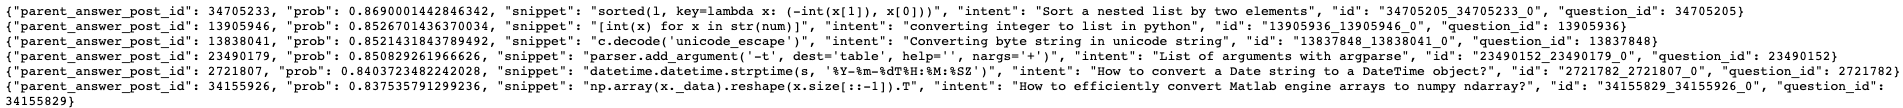

Notably, this data is not contained in a list object, but includes multiple json objects in sequence.

In [8]:
# CoNala Mined Data

# This file is different in format from the other CoNaLa Competition Data, 
# and contains multiple json objects. We need to handle it differently.

# First instantiate an empty list, this will be used hold all of the dictionary objects as a list
# of dictionaries.
conala_mined_data_list = []

# Open file, loop through the json objects in the file, appending the list each time. 
with open('data/conala-corpus/conala-mined.jsonl') as f:
    for jsonObj in tqdm(f):
        code_dic = json.loads(jsonObj)
        conala_mined_data_list.append(code_dic)

593891it [00:07, 78221.91it/s] 


In [10]:
# Peek at the list created.
conala_mined_data_list[-5:]

[{'parent_answer_post_id': 2957181,
  'prob': 7.832874238417845e-05,
  'snippet': 'Red\nBlue',
  'intent': 'BeautifulSoup: just get inside of a tag, no matter how many enclosing tags there are',
  'id': '2957013_2957181_7',
  'question_id': 2957013},
 {'parent_answer_post_id': 5180297,
  'prob': 7.73206863173198e-05,
  'snippet': 'RawPurchaseAmount',
  'intent': 'Python Remove Comma In Dollar Amount',
  'id': '5180184_5180297_4',
  'question_id': 5180184},
 {'parent_answer_post_id': 5180297,
  'prob': 7.572041759033881e-05,
  'snippet': 'import re\nRawPurchaseAmount',
  'intent': 'Python Remove Comma In Dollar Amount',
  'id': '5180184_5180297_5',
  'question_id': 5180184},
 {'parent_answer_post_id': 41140750,
  'prob': 4.903111128849962e-05,
  'snippet': 'Red\nBlue',
  'intent': 'BeautifulSoup: just get inside of a tag, no matter how many enclosing tags there are',
  'id': '2957013_41140750_6',
  'question_id': 2957013},
 {'parent_answer_post_id': 39398969,
  'prob': 3.013026706870125

This data is now in the same list of json objects format that the train and test data above were. It can be converted into a pandas DataFrame similarly.

Below I look briefly into the shape and contents of this DataFrame.

In [17]:
# Convert list of json objets for mined data into pandas DataFrame
conala_mined_df = pd.DataFrame(conala_mined_data_list)

# Peek at the DataFrame for the mined CoNaLa data.
display(conala_mined_df.head())

# Check shape of the DataFrame
conala_mined_df.shape

,parent_answer_post_id,prob,snippet,intent,id,question_id
0,34705233,0.869000,"sorted(l, key=lambda x: (-int(x[1]), x[0]))",Sort a nested list by two elements,34705205_34705233_0,34705205
1,13905946,0.852670,[int(x) for x in str(num)],converting integer to list in python,13905936_13905946_0,13905936
2,13838041,0.852143,c.decode('unicode_escape'),Converting byte string in unicode string,13837848_13838041_0,13837848
3,23490179,0.850829,"parser.add_argument('-t', dest='table', help='...",List of arguments with argparse,23490152_23490179_0,23490152
4,2721807,0.840372,"datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:...",How to convert a Date string to a DateTime obj...,2721782_2721807_0,2721782


(593891, 6)

Note that the index is not random, the records are sorted such that the probabilities decrease along the list. That is, the lower the rank of the index, the higher the probability score. To look more at the distribution of the probabilities included, the `pd.describe()` function is useful. 

In [20]:
# Looking at the DataFrame's statistics for numerical columns.
# Drop the columns for which statistics are not meaningful.
conala_mined_df.drop(["parent_answer_post_id", "question_id"], axis=1).describe()

,prob
count,593891.000000
mean,0.064413
std,0.085104
min,0.000030
25%,0.016376
50%,0.034263
75%,0.074638
max,0.869000


The `parent_answer_post_id` and `question_id` columns are not too meaninful since the numbers stored in these columns are nominal, so these were dropped in the above.

The statistics we see for the `prob` column is quite informative here. Of note, the mean probability is very low, at 6.4%, and even the 75th percentile is much lower than expected at 7.5%. This means there are far fewer records here where the code snippet is confidently associated with an intent than I was hoping for. This problem is discussed in the study which produced this mined code: 

> existing heuristic methods (e.g., pairing the title of a post with the code in the accepted answer) are limited both in their coverage and the
correctness of the NL-code pairs obtained.

To get a better intuition for how this `prob` score describes the association of the given `intent` and `snippet` I manually sampled the data and reviewed it.

Firstly, for records with any `prob` value. 

In [25]:
# First sample from the whole DataFrame.
# Run cell multiple times to see random samples.
conala_mined_df.sample(10)

,parent_answer_post_id,prob,snippet,intent,id,question_id
439794,19483437,0.016919,json1_str = json1_file.read()\njson1_data = js...,Converting JSON String to Dictionary Not List,19483351_19483437_7,19483351
199338,16446104,0.055447,"o = map(int, ip.split('.'))","Conversion from IP string to integer, and back...",5619685_16446104_2,5619685
91114,37833745,0.113820,"['Ask', 'not', 'what', 'your', 'country', 'can...",How do I remove punctuation from an item in a ...,37833260_37833745_5,37833260
574040,15611666,0.003834,import numpy as np\nd1['testValue'] = np.rando...,Frequency tables in pandas (like plyr in R),15589354_15611666_15,15589354
236948,25622682,0.045628,globals()[someclass.__name__] = someclass,How to use dill to serialize a class definition?,25613543_25622682_3,25613543
194408,19391867,0.056920,gc.is_tracked(d),Keeping large dictionary in Python affects app...,19391648_19391867_3,19391648
216456,25097952,0.050652,disk_basedir = os.path.dirname(os.path.dirname...,UnknownTimezoneError Exception Raised with Pyt...,9158846_25097952_6,9158846
140854,16349356,0.078379,"print(('e:', e))",Python assigning multiple variables to same va...,16348815_16349356_0,16348815
230934,20348305,0.047034,"with open('t2.csv', 'rb') as incsv:\n pass",Pythonically add header to a csv file,20347766_20348305_7,20347766
36192,41882155,0.211120,[f.closed for f in gen_abc()],Is it safe to combine 'with' and 'yield' in py...,41881731_41882155_0,41881731


Now, for records with `prob` values greater than `0.5`. 

In [13]:
# Sample from the DataFrame, among records with prob > 0.5.
# Run cell multiple times to see random samples.
conala_mined_df[conala_mined_df['prob']>0.5].sample(10)

,parent_answer_post_id,prob,snippet,intent,id,question_id
1673,40066329,0.566225,plt.show(),User defined legend in python,40042223_40066329_0,40042223
720,5905166,0.630062,"print((key, value))",How to print a dictionary's key?,5904969_5905166_0,5904969
580,740384,0.643704,print(any(x in a for x in b)),How to check if one of the following items is ...,740287_740384_0,740287
1956,13521621,0.552587,plt.show(),matplotlib: how to prevent x-axis labels from ...,13515471_13521621_0,13515471
2406,5122411,0.532372,print('%20s' % somevar),Printing tabular data in Python,5122347_5122411_0,5122347
2771,21023125,0.520032,"pd.DataFrame(df.values * df2.values, columns=d...",Pandas: Elementwise multiplication of two data...,21022865_21023125_0,21022865
2070,8610359,0.547494,Gtk.main(),Python GTK+ Canvas,8608686_8610359_0,8608686
390,37619560,0.667592,[sum([x[1] for x in i]) for i in data],Summing 2nd list items in a list of lists of l...,37619348_37619560_0,37619348
2011,9627900,0.549858,"df.pivot_table('Y', rows='X', cols='X2')",Python Pandas Pivot Table,9550867_9627900_0,9550867
1911,28092374,0.554668,plt.show(),Matplotlib's fill_between doesnt work with plo...,28091290_28092374_0,28091290


The intent of each row is commonly cut off in the cell output as the string is too long. In order to rectify this and view the entire contents, the below can be run.

In [14]:
# Use this cell to view full contents of intent and snippet strings for specific 
# records in the sample, by its index.
ind = 143 # index 143 just as an example
print(conala_mined_df.loc[ind,'intent'])
print(conala_mined_df.loc[ind,'snippet'])

How to delete a record in Django models?
SomeModel.objects.filter(id=id).delete()


Visually exploring these code snippets would be easier if the snippets and intent could be viewed among multiple other records. In the below cell, I created a method of exporting rows to a csv file for visual and manual exploration. I used the below cell for many values of `ind`, and therefore many records in order to view and compare the snippets and intent contained in the `mined_df`. This was an important exercise so to get familiar with how well the `prob` score indicates the relation of these other two fields.

In [15]:
# Store this record result in helper csv file to aid manually viewing individual
# records as a random sample. 
# Run for each value of `ind` to be appended to a csv file for exploration.
with open('prob_explore.csv', mode='a+') as f:
    pd.DataFrame(conala_mined_df.loc[ind]).T.to_csv(f, mode='a+', header=False)

After conducting multiple samples of the data, and with inspection of the columns `intent` and `snippet`, I've concluded that the the code snippets with low probability scores in the mined data are so poorly related with the intent they have been mined with that they are not valuable for training a model. I will remove a large number of the records based on the prob score they have. 

#### Proposed `prob` Cutoff
[[Back To TOC]](#Table-of-Contents)

Through the exploration and sampling above, I've learned that many records which have a probability of 50% or greater are quite reasonably associated with their code snippet. 

In the cell below we can determine how many records meet this threshold.

In [26]:
# Can use this function to determine how many records have a probability greater than `prob_thresh`
prob_thresh = 0.5
len(conala_mined_df[conala_mined_df["prob"]>prob_thresh])

3385

In [27]:
# Use the mined_df with only the records with probability greater than 50%. 
conala_mined_df = conala_mined_df[conala_mined_df['prob']>prob_thresh]

In [30]:
# &&&&&& Pickle the mined df. 
pickled_conala_mined_df = open('pickled_conala_mined_df', 'ab+') 
# source, destination 
pickle.dump(conala_mined_df, pickled_conala_mined_df)                      
pickled_conala_mined_df.close() 

In [28]:
conala_mined_df

,parent_answer_post_id,prob,snippet,intent,id,question_id
0,34705233,0.869000,"sorted(l, key=lambda x: (-int(x[1]), x[0]))",Sort a nested list by two elements,34705205_34705233_0,34705205
1,13905946,0.852670,[int(x) for x in str(num)],converting integer to list in python,13905936_13905946_0,13905936
2,13838041,0.852143,c.decode('unicode_escape'),Converting byte string in unicode string,13837848_13838041_0,13837848
3,23490179,0.850829,"parser.add_argument('-t', dest='table', help='...",List of arguments with argparse,23490152_23490179_0,23490152
4,2721807,0.840372,"datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:...",How to convert a Date string to a DateTime obj...,2721782_2721807_0,2721782
...,...,...,...,...,...,...
3380,795000,0.500243,{{(item.date | date): 'Y M d'}},How to convert datetime to string in python in...,794995_795000_0,794995
3381,18145399,0.500193,"df = df.drop('column_name', 1)",Delete column from pandas DataFrame,13411544_18145399_2,13411544
3382,40584271,0.500171,"reverse_d = {value: key for key, values in lis...",How to get a list which is a value of a dictio...,40584186_40584271_0,40584186
3383,3227931,0.500164,config_file = os.path.expanduser('~/foo.ini'),Cross-platform addressing of the config file,3227624_3227931_0,3227624


## Combining Data
[[Back To TOC]](#Table-of-Contents)

We have have three DataFrames now. Let's look at their shapes and column names. We should compare them to make sure they are consistent, or create a plan for making them consistent.

In [34]:
# Summarize the shapes
print("Shape of CoNaLa train df:", conala_train_df.shape)
print("Shape of CoNaLa test df:", conala_test_df.shape)
print("Shape of CoNaLa mined df:", conala_mined_df.shape)

print("\nColumns of CoNaLa train df:\n", conala_train_df.columns)
print("\nColumns of CoNaLa test df:\n", conala_test_df.columns)
print("\nColumns of CoNaLa mined df:\n", conala_mined_df.columns)

Shape of CoNaLa train df: (2379, 4)
Shape of CoNaLa test df: (500, 4)
Shape of CoNaLa mined df: (3385, 6)

Columns of CoNaLa train df:
 Index(['intent', 'rewritten_intent', 'snippet', 'question_id'], dtype='object')

Columns of CoNaLa test df:
 Index(['intent', 'rewritten_intent', 'snippet', 'question_id'], dtype='object')

Columns of CoNaLa mined df:
 Index(['parent_answer_post_id', 'prob', 'snippet', 'intent', 'id',
       'question_id'],
      dtype='object')


The `conala_mined_df` has three columns that are the same as the other two, and is missing one column. 

Same columns:
- `question_id`
- `snippet`
- `intent`

Missing Column:
- `rewritten_intent`

The `question id` appears to be used as an index. I should be able to do the same, but will have to check with the mined data that the numbers don't overlap as these need to be unique.

The `snippet` column is where the snippets of code are contained. It's very likely that this column shouldn't be modified before being vectorized since this is the data that I'm trying to interpret and I do not want to introduce bias. When I conduct vectorizing on this shortly, there will be some decisions to be made about how to break up the data.

The `intent` column contains plain english questions submitted by developers to [Stack Overflow](#stackoverflow.com), in order to achieve certain tasks. This contains information about **desired intent**. Unfortunately most of these are written as questions and so the intent is not structured as preferred. 

The `rewritten_intent` column is a colum which has been viewed by the CoNaLa team to create a more plain-english description about the code in question. This will be extremely helpful since this represents some preliminary cleaning which has already been done for me. Unfortunately this doesn't exist for the `conala_mined_df` so I'll have to determine how to either create it, or handle the disparity.

This is a good time to export the data to a readable format for me to review visually.

In [35]:
# Export to csv for readability.
conala_train_df.to_csv(r'conala_train_df.csv')
conala_test_df.to_csv(r'conala_test_df.csv')
# This is a big dataset so we should reduce it 
conala_mined_df.to_csv(r'conala_mined_df.csv')

### Cleaning Data
[[Back To TOC]](#Table-of-Contents)

In [2]:
# df.duplicated()
# df.nan()
# describe()
# Impute?


## Vectorizing Text Data
[[Back To TOC]](#Table-of-Contents)

### Simple Bag of Words Vectorization
[[Back To TOC]](#Table-of-Contents)

#### Vectorizing `conala_train_df` with Bag of Words
[[Back To TOC]](#Table-of-Contents)

In [36]:
# Check for nan
conala_train_df.isna().sum()

intent               0
rewritten_intent    79
snippet              0
question_id          0
dtype: int64

In [37]:
# Fill with ""
conala_train_df.fillna('', inplace=True)

conala_train_df.isna().sum()

intent              0
rewritten_intent    0
snippet             0
question_id         0
dtype: int64

In [38]:
# Instantiate 
conala_train_bagofwords = CountVectorizer(stop_words="english", min_df=5)

# Fit 
conala_train_bagofwords.fit(conala_train_df["rewritten_intent"])

# Transform with the bag of words.
conala_train_bag_SM = conala_train_bagofwords.transform(conala_train_df["rewritten_intent"])
conala_train_bag_SM

<2379x435 sparse matrix of type '<class 'numpy.int64'>'
	with 10451 stored elements in Compressed Sparse Row format>

In [39]:
# Create a DataFrame (more workable) from the Sparse Matrix 
conala_train_bag_df = pd.DataFrame(columns=conala_train_bagofwords.get_feature_names(),
                                   data=conala_train_bag_SM.toarray())

In [40]:
conala_train_bag_df.sum().sort_values(ascending=False)

list           781
string         665
dictionary     238
value          236
values         235
              ... 
fields           5
org              5
comparison       5
punctuation      5
ending           5
Length: 435, dtype: int64

#### Vectorizing `conala_test_df`

In [41]:
# Check for nan
conala_test_df.isna().sum()

intent               0
rewritten_intent    23
snippet              0
question_id          0
dtype: int64

In [42]:
# Fill with ""
conala_test_df.fillna('', inplace=True)

conala_test_df.isna().sum()

intent              0
rewritten_intent    0
snippet             0
question_id         0
dtype: int64

In [43]:
# Transform with the bag of words from the train df
conala_test_bag_SM = conala_train_bagofwords.transform(conala_test_df["rewritten_intent"])
conala_test_bag_SM

<500x435 sparse matrix of type '<class 'numpy.int64'>'
	with 2023 stored elements in Compressed Sparse Row format>

In [44]:
# Create a DataFrame (more workable) from the Sparse Matrix 
conala_test_bag_df = pd.DataFrame(columns=conala_train_bagofwords.get_feature_names(),
                                   data=conala_test_bag_SM.toarray())

Since this is our test set, we shouldn't peek at the results of the transformation here.

#### Vectorizing `conala_mined_df` with Bag of Words
[[Back To TOC]](#Table-of-Contents)

We should have less confidence in the `intent` field contained in `conala_mined_df`, since this field is coming from a procedurally collected dataset, and has not been manually cleaned like that of the trained data. Because of this I'm proposing to use the bag of words we have fit to the train dataset in order to transform the mined dataset here. This will (hopefully) have the effect of identifying the words that should be considered as signficant to determining intent, as indicated by the fit on the training data set.

In [45]:
# Check for nan
conala_mined_df.isna().sum()

parent_answer_post_id    0
prob                     0
snippet                  0
intent                   0
id                       0
question_id              0
dtype: int64

In [46]:
# Transform with the bag of words from the train df
conala_mined_bag_SM = conala_train_bagofwords.transform(conala_mined_df["intent"])
conala_mined_bag_SM

<3385x435 sparse matrix of type '<class 'numpy.int64'>'
	with 12370 stored elements in Compressed Sparse Row format>

The number of stored elements from the mined df is a bit low. This may not be a good way of interpreting the mined code. There's some things we can try/consider: 

- graph min_df, and look at vocab size as WELL as elements contained. as WELL as vocab:records, elements:records. 

- only some of the mined records have high probability anyways, maybe we can filter out low probabilities and try again.
- maybe we filter out the rows that have no words in the bag of words which will cut down the data anways
- maybe both.

In [47]:
# Create a DataFrame (more workable) from the Sparse Matrix 
conala_mined_bag_df = pd.DataFrame(columns=conala_train_bagofwords.get_feature_names(),
                                   data=conala_mined_bag_SM.toarray())

In [48]:
conala_mined_bag_df.sum().sort_values(ascending=False)

python    1631
list       772
string     488
pandas     391
using      241
          ... 
df2          0
mydict       0
var          0
lower        0
com          0
Length: 435, dtype: int64

#### Comparing Vectorized `conala_mined_df` and `conala_trained_df`
[[Back To TOC]](#Table-of-Contents)

In [49]:
conala_train_bag_df.sum().index==conala_mined_bag_df.sum().index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [50]:
conala_train_bag_df.sum().values
conala_mined_bag_df.sum().values

array([   4,    3,    5,    1,    4,    0,    0,    2,    0,    0,   52,
          2,    0,   19,    0,    0,    6,   62,   31,   16,   20,    2,
         23,    0,  236,   22,    2,   15,    6,    2,   13,    4,   10,
          1,    4,   44,   18,   77,   11,   19,    1,    0,   25,    0,
         10,   10,   12,   16,    2,    8,   34,   48,   79,   57,   23,
          7,   15,   19,  128,    0,   92,    0,    5,    9,   15,   18,
          2,   39,    5,    2,    2,    5,    5,   11,   18,    5,    8,
        205,   37,    9,    8,   24,   73,   25,   26,   15,    0,    0,
         96,  212,   22,   56,   52,   10,   11,    7,    5,    0,   27,
          2,    0,    6,    0,    0,   52,   57,  204,    8,   12,   18,
          5,    0,   28,    8,    1,    5,  122,    9,    4,    3,    5,
          0,   18,    2,    8,    0,   65,   79,    2,    3,    7,   10,
          0,    1,    0,    5,   10,    3,    9,    1,    0,   15,    0,
          7,   59,    2,   50,   19,   11,  146,   

In [51]:
# Create a df for comparison of word frequency in bag of words
bag_df = pd.DataFrame(data={"train_freq":conala_train_bag_df.sum().values, "mined_freq":conala_mined_bag_df.sum().values},
             index=conala_train_bag_df.sum().index)

In [52]:
# Inspecting the most common terms of the bag of words.
display(bag_df.sort_values(by="train_freq", ascending=False))
display(bag_df.sort_values(by="mined_freq", ascending=False))

,train_freq,mined_freq
list,781,772
string,665,488
dictionary,238,204
value,236,142
values,235,202
...,...,...
ends,5,1
concatenating,5,2
average,5,10
attributes,5,4


,train_freq,mined_freq
python,80,1631
list,781,772
string,665,488
pandas,107,391
using,126,241
...,...,...
delay,5,0
bigger,5,0
org,5,0
old_list,6,0


In [53]:
train_bag_sorted = bag_df.sort_values(by="train_freq", ascending=False)

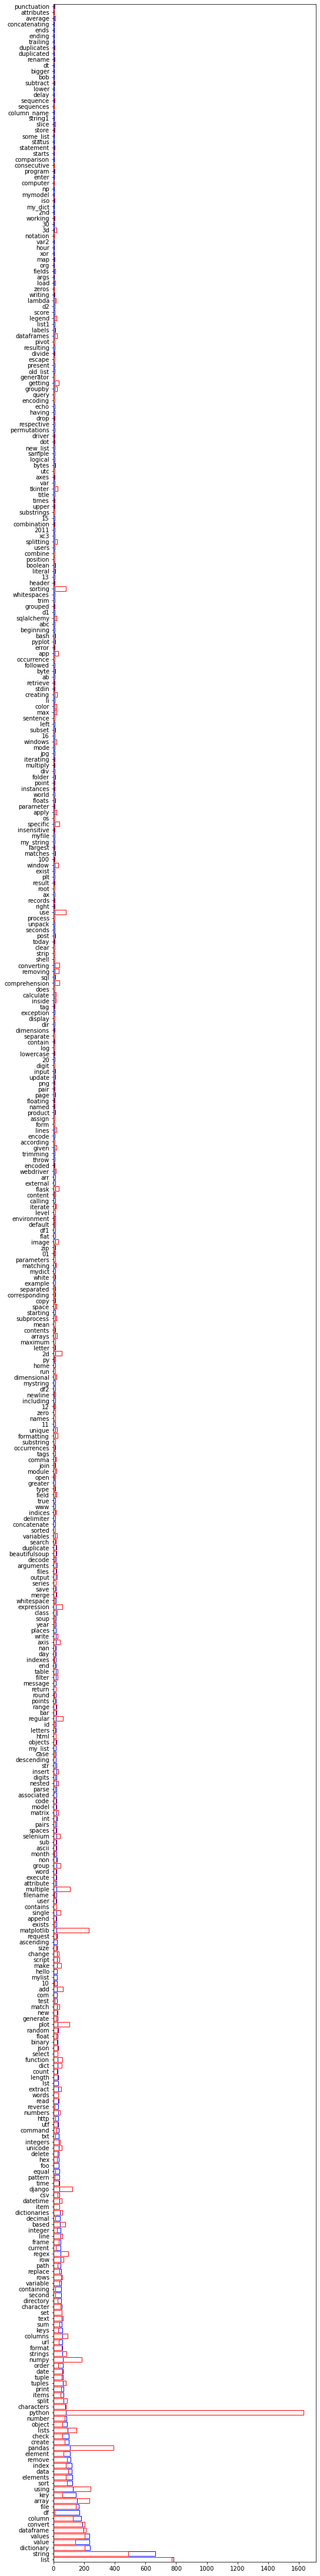

In [54]:
# Plot term frequency, mined compared with train
plt.figure(figsize=(8,80))
plt.barh(train_bag_sorted.index,train_bag_sorted["train_freq"], fill=False, edgecolor='b')
plt.barh(train_bag_sorted.index,train_bag_sorted["mined_freq"], fill=False, edgecolor='r')
plt.autoscale(enable=True, axis='y', tight=True)
plt.show()

The terms are actually quite comparable. Enough so that I'm comfortable proceeding with this for preliminary modelling.

One point in particular is worth noting. The term "python" is far more represented in the mined data. This indicates to me that the term is so frequently used that it is not actually helpful in identifying intent. This is not a surprising result since the CoNaLa competition was designed with Python code specifically being analyzed. **I'm going to drop this row** since it simply does not give valuable information seeing as the code should all be written in python anyways.

#### Combining DataFrames
[[Back To TOC]](#Table-of-Contents)

In [55]:
print(conala_train_bag_df.shape)
print(conala_mined_bag_df.shape)
print(conala_train_bag_df.shape[0]+conala_mined_bag_df.shape[0])

(2379, 435)
(3385, 435)
5764


In [56]:
combined_bag_df = pd.concat([conala_train_bag_df, conala_mined_bag_df], ignore_index=True)
combined_bag_df

,01,10,100,11,12,13,15,16,20,2011,...,world,write,writing,www,xc3,xor,year,zero,zeros,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first 2379 rows are from the train data, and the last 3385 are from the mined data.

In [57]:
# Dropping the `python` column
combined_bag_df.drop(columns="python", index=1, inplace=True)

In [58]:
from varname import nameof
# &&&&&& Pickling both dfs. 
pickle_list = [conala_train_bag_df, conala_mined_bag_df, combined_bag_df]

for df in pickle_list:
    file = open(f'pickled_{nameof(df)}', 'ab+') 
    pickle.dump(df, file)                      
    file.close()

#### Dimension Reduction of Bag of Words
[[Back To TOC]](#Table-of-Contents)

##### PCA on Bag of Words
[[Back To TOC]](#Table-of-Contents)

##### T-SNE on Bag of Words
[[Back To TOC]](#Table-of-Contents)

### Word2Vec Text Vectorization
[[Back To TOC]](#Table-of-Contents)

Word2Vec Embeddings are 

See also Doc2Vec, FastText and wrappers for VarEmbed and WordRank.
[[x]](#References)

In [13]:
# Import Gensim, and get word2vec model methods. 
from gensim.models import Word2Vec
import gensim.downloader # allows downloading of existing models

# Downloading a pre-trained vector using 50 dimensions, from twitter data
wv = gensim.downloader.load('glove-twitter-50')

In [14]:
# Checking vocab type
type(wv.vocab)

dict

In [15]:
# Terms in vocab
len(wv.vocab)

1193514

In [16]:
# Checking for similar terms, cosine similarity!
wv.most_similar("man")

[('boy', 0.8404532670974731),
 ('was', 0.8205661177635193),
 ('bad', 0.819680392742157),
 ('dude', 0.8176411986351013),
 ('he', 0.8076108694076538),
 ('guy', 0.7904506921768188),
 ('god', 0.7806254029273987),
 ('hell', 0.7783043384552002),
 ('problem', 0.7771045565605164),
 ('even', 0.7761484980583191)]

In [17]:
# Check if word is in wv vocab
"cat" in wv.vocab

True

In [18]:
# How many unique word are in our corpus?
len(unique_words)

2017

now check how many of these are in the word2vec pre-trained model.

In [19]:
# Find the list of words contained in model, and those missing.
contained=[] # list of terms in both our corpus and the model
missing=[] # list of terms in our corpus, but not the model
msk=[] # True/false mask for unique words that are in the model. 
for i in unique_words:
    if(i in wv.vocab):
        msk.append(1)
        contained.append(i)
    else:
        msk.append(0)
        missing.append(i)
sum(msk)

1670

In [20]:
# peek at missing words
missing

['datafram',
 'stdin',
 'centroids',
 'uenc',
 'tuple',
 'existgdbpath',
 'webbrowser',
 'bigdict',
 'getattr',
 'mymodel',
 'pplnum',
 'bashrc',
 'delimeters',
 'wxpython',
 'concatenate',
 'csvwriter',
 'mydict',
 'reassign',
 'pymongo',
 'listtwo',
 'aaabbbccc',
 'colorbar',
 'cookiename',
 'dsomeotherparam',
 'sudsmove',
 'separators',
 'pylab',
 'tkinter',
 'encodeuricomponent',
 'elementwise',
 'appending',
 'roomnum',
 'xbc',
 'xbcy',
 'firstset',
 'overwriting',
 'parenthesesis',
 'abcdabcva',
 'iterators',
 'quadmesh',
 'dictlist',
 'subcolumn',
 'substring',
 'interpeter',
 'unescape',
 'mylistoftuples',
 'subkey',
 'decryption',
 'parsed',
 'checksum',
 'serialize',
 'dataframe',
 'eplacement',
 'citypopulation',
 'thelist',
 'saleid',
 'adfix',
 'dateobj',
 'userprofile',
 'sequentially',
 'dtypes',
 'onclick',
 'objs',
 'subdirectories',
 'thedict',
 'atgc',
 'pygobject',
 'lseperatedorblist',
 'reporo',
 'xdeadbeef',
 'subsets',
 'mystringhere',
 'taskkill',
 'componentre

&&&& Loading Pre-existing vec model

&&&&& When using Word2Vec, there's much extra thought to be given regarding how the sentences I'm feeding to the model will be handled. There's a large number of special characters such as brackets and "%" for example.

&&&&& Comparing the unique words to vocab of pre-trained.

In [71]:
# A couple of functions to help process lists of text sentences.

import re
import nltk
nltk.download('punkt')

def clean_split_text_list(li):
    '''
    Takes a list of sentences.
    Returns a list of lists, each inner list is words in a sentence.
    Also adds a space on either side of non-word, non-digit chars. 
    This allows for brackets, etc. to be considered as their own word, unless 
    vectorized with a model which does not include them.
    '''
    
    new_list = list()
    for i in li:
        try:
            i = i.lower() #lowercase the sentence
        except:
            pass
        try:
            i = re.sub('([^a-zA-Z\ \d])', r' \1 ', i) # Add spaces between special chars
        except:
            pass
        try:
            i = list(i.split(' '))
        except:
            pass
        new_list.append(i)
    return new_list

def vectorize_text_list(li):
    '''
    Takes a list of lists.
        - first list is a sentence
        - inner list is a list of words.
    Returns a list of lists, each inner list is words in a sentence.
    Also adds a space on either side of non-word, non-digit chars. 
    This allows for brackets, etc. to be considered as their own word, unless 
    vectorized with a model which does not include them.
    '''
    new_list=list() # new list object to be returned at end.
    for i in li:
        if i == None:
            new_list.append(np.zeros_like(wv["empty"])) # If None, empty array of wv shape.
            continue
        if type(i) == float:
            i = str(i)
        sub_list=list() # list of vecs, representing a sentence
        for j in i: 
            try:
                vec = wv[j]
                sub_list.append(vec)
            except KeyError:
                continue
        new_list.append(sub_list)
    return new_list

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/justin.hugh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### PCA on Word2Vec
[[Back To TOC]](#Table-of-Contents)

#### T-SNE on Word2Vec
[[Back To TOC]](#Table-of-Contents)

## Intent Paradigms
[[Back To TOC]](#Table-of-Contents)

We can look at the above graph to see some common themes which emerge, at least on the level of word frequency. 

- String manipulation 
- List manipulation 
- Type change
- Regular Expression
- DataFrame Manipulation
- Find object  


&&...



# Modelling and Analysis
[[Back To TOC]](#Table-of-Contents)


## ML Clustering Models

In [44]:
# For this preliminary modelling, we'll work with: 
combined_bag_df

,01,10,100,11,12,13,15,16,20,2011,...,world,write,writing,www,xc3,xor,year,zero,zeros,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With this data, our goal is to identify a number of clusters which are "similar" to one another. These can give an understanding of the paradigms which are commonly found in code snippets (at least in Stack Overflow). 

So the plan of action will be to apply various clustering models to the vectorized data to see what we can learn from each in turn. The 4 we will try are: 
- Agglomerative
- DB Scan
- KMeans
- Gaussian Mixture

In [45]:
# Importing the libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

### Agglomerative Clustering
[[Back To TOC]](#Table-of-Contents)

- Single
- Maximum
- Average
- Ward's


In [46]:
%%time
from scipy.cluster.hierarchy import dendrogram, linkage
# we are using the average linkage here
linkagemat = linkage(combined_bag_df, 'average') 

CPU times: user 9.47 s, sys: 267 ms, total: 9.73 s
Wall time: 11.9 s


CPU times: user 7.62 s, sys: 197 ms, total: 7.81 s
Wall time: 8.32 s


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [85.0, 85.0, 95.0, 95.0],
  [135.0, 135.0, 145.0, 145.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [165.0, 165.0, 190.0, 190.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [365.0, 365.0, 375.0, 375.0],
  [385.0, 385.0, 395.0, 395.0],
  [445.0, 445.0, 455.0, 455.0],
  [435.0, 435.0, 450.0, 450.0],
  [425.0, 425.0, 442.5, 442.5],
  [465.0, 465.0, 475.0, 475.0],
  [495.0, 495.0, 505.0, 505.0],
  [485.0, 485.0, 500.0, 500.0],
  [525.0, 525.0, 535.0, 535.0],
  [515.0, 515.0, 530.0, 530.0],
  [545.0, 545.0, 555.0, 555.0],
  [565.0, 565.0, 575.0, 575.0],
  [585.0, 585.0, 595.0, 595.0],
  [570.0, 570.0, 590.0, 590.0],
  [550.0, 550.0, 580.0, 580.0],
  [615.0, 615.0, 625.0, 625.0],
  [605

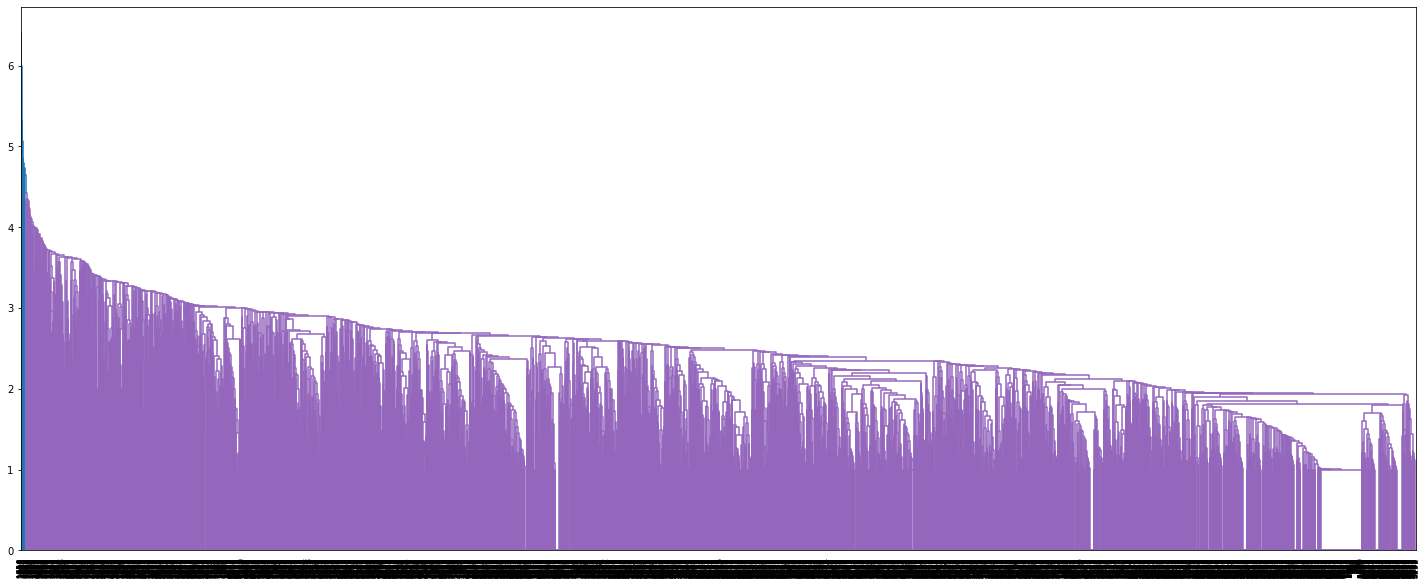

In [47]:
%%time
plt.figure(figsize=(25, 10))
dendrogram(
    linkagemat,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.  # font size for the x axis labels
);

From the dendrogram above, we can see how the number of clusters reduces as the avereage distrance is increased. 

In [48]:
%%time
agg_clus = AgglomerativeClustering(n_clusters=20, linkage='average').fit(combined_bag_df)

CPU times: user 9.04 s, sys: 167 ms, total: 9.21 s
Wall time: 9.43 s


In [49]:
agg_clus.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
np.unique(agg_clus.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([5732,    6,    2,    4,    1,    1,    1,    2,    3,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1]))

In [51]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(combined_bag_df, agg_clus.labels_)

0.32072204664078113

This doesn't seem all that helpful. We do have multiple clusters, but the vast majority of them lie in one.

We can try to standard scale the data and run the same.

In [52]:
from sklearn.preprocessing import StandardScaler

# Initialize
ss = StandardScaler()

# Fit 
ss_fit = ss.fit(combined_bag_df)

# Transform
combined_bag_df_ss = ss.transform(combined_bag_df)

In [53]:
%%time
from scipy.cluster.hierarchy import dendrogram, linkage
# we are using the average linkage here
linkagemat = linkage(combined_bag_df_ss, 'average') 

CPU times: user 8.98 s, sys: 143 ms, total: 9.12 s
Wall time: 9.3 s


CPU times: user 7.08 s, sys: 121 ms, total: 7.2 s
Wall time: 7.3 s


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [375.0, 375.0, 385.0, 385.0],
  [395.0, 395.0, 405.0, 405.0],
  [380.0, 380.0, 400.0, 400.0],
  [365.0, 365.0, 390.0, 390.0],
  [355.0, 355.0, 377.5, 377.5],
  [445.0, 445.0, 455.0, 455.0],
  [435.0, 435.0, 450.0, 450.0],
  [465.0, 465.0, 475.0, 475.0],
  [535.0, 535.0, 545.0, 545.0],
  [525.0, 525.0, 540.0, 540.0],
  [515.0, 515.0, 532.5, 532.5],
  [575.0, 575.0, 585.0, 585.0],
  [565.0, 565.0, 580.0, 580.0],
  [605.0, 605.0, 615.0, 615.0],
  [625.0, 625.0, 635.0, 635.0],
  [610.0, 610.0, 630.0, 630.0],
  [595.0, 595.0, 620.0, 620.0],
  [655.0, 655.0, 665.0, 665.0],
  [645.0, 645.0, 660.0, 660.0],
  [675.0, 675.0, 685.0, 685.0],
  [652.5, 652.5, 680.0, 680.0],
  [715.0, 715.0, 725.0, 725.0],
  [735.0, 735.0, 745.0, 745.0],
  [795.0, 795.0, 805.0, 805.0],
  [785.0, 785.0, 800.0, 800.0],
  

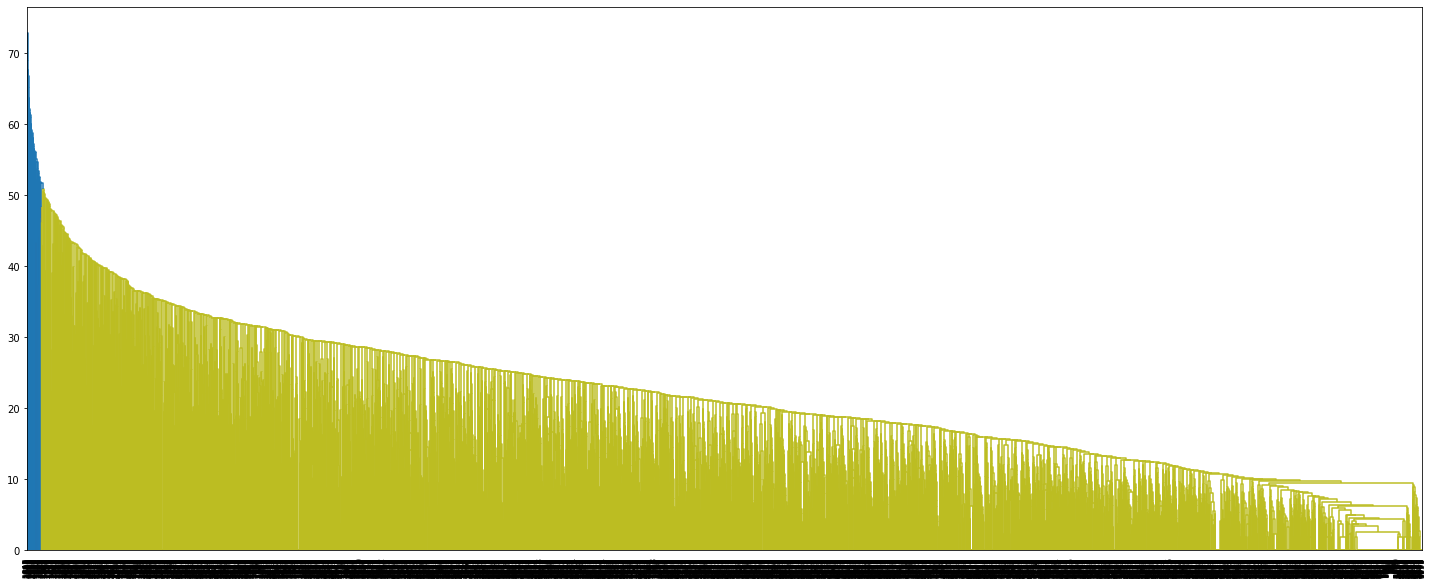

In [54]:
%%time
plt.figure(figsize=(25, 10))
dendrogram(
    linkagemat,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.  # font size for the x axis labels
);

From the dendrogram above, we can see how the number of clusters reduces as the avereage distrance is increased. 

In [55]:
%%time
agg_clus = AgglomerativeClustering(n_clusters=20, linkage='average').fit(combined_bag_df_ss)

CPU times: user 9.07 s, sys: 170 ms, total: 9.23 s
Wall time: 9.61 s


In [69]:
# Pickle the model for rapid use later. 
agglom_model = open('pickled_agglom_model', 'ab+') 

# source, destination 
pickle.dump(agg_clus, agglom_model)                      
agglom_model.close() 

In [56]:
agg_clus.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
np.unique(agg_clus.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([5740,    2,    1,    4,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1]))

In [58]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(combined_bag_df, agg_clus.labels_)

0.13378559475203075

This is just as bad, and the silhouette score is worse.

### DBSCAN
[[Back To TOC]](#Table-of-Contents)


In [59]:
# Instantiate
db = DBSCAN(eps=2, min_samples=10)

In [60]:
db.fit(combined_bag_df.sample(10))

DBSCAN(eps=2, min_samples=10)

In [61]:
%%timeit
from sklearn.cluster import DBSCAN

# Instantiate
db = DBSCAN(eps=2, min_samples=10)

# Fit
db.fit(combined_bag_df)

27.1 s ± 181 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
type(db)

sklearn.cluster._dbscan.DBSCAN

In [62]:
#try this out with a range of eps and min_samples
print(db.labels_.sum()) # labels

-10


In [63]:
np.unique(db.labels_, return_counts=True)

(array([-1]), array([10]))

Still not great results here.

Try a larger eps, reduce min_samples

In [64]:
%%timeit
# Instantiate
db = DBSCAN(eps=4, min_samples=5)

# Fit
db.fit(combined_bag_df)

30.5 s ± 1.13 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
#try this out with a range of eps and min_samples
print(db.labels_.sum()) # labels

-10


In [66]:
np.unique(db.labels_, return_counts=True)

(array([-1]), array([10]))

Not much better

In [67]:
db_labelled_df = combined_bag_df.copy()
db_labelled_df.insert(0,"DB_label", db.labels_)

ValueError: Length of values (10) does not match length of index (5763)

In [ ]:
db_zero = db_labelled_df[db_labelled_df["DB_label"]==0]

## Autoencoding

Attempting Dimension Reduction with Autoencoding

# Conclusion
[[Back To TOC]](#Table-of-Contents)


# References
[[Back To TOC]](#Table-of-Contents)

[x] Stack Overflow. 2020. [online] Available at: https://stackoverflow.com

[x] CoNaLa: The Code/Natural Language Challenge. 2020. CoNaLa: The Code/Natural Language Challenge. [online] Available at: <https://conala-corpus.github.io/#dataset-information> [Accessed 13 November 2020].

[x] Learning to Mine Aligned Code and Natural Language Pairs from Stack Overflow. arXiv:1805.08949v1. 23 May 2018. Pengcheng Yin, Bowen Deng, Edgar Chen, Bogdan Vasilescu, Graham Neubig, Carnegie Mellon University, USA. [online]. Available at: https://arxiv.org/pdf/1805.08949.pdf

[x] Neural Machine Translation (seq2seq) Tutorial. 2017. Minh-Thang Luong and Eugene Brevdo and Rui Zhao. [online]. Available at: https://github.com/tensorflow/nmt

[x] Character-level recurrent sequence-to-sequence model. 2020/04/26. Francois Chollet. [online]. Available at: https://keras.io/examples/nlp/lstm_seq2seq/

[x] models.word2vec – Word2vec embeddings. 2020/11/04. Radim Řehůřek. [online]. Available at: https://radimrehurek.com/gensim/models/word2vec.html
